# Design a system to identify and extract entities like patient demographics, diseases, and treatment details from conversation transcripts to streamline medical insurance claim processing.

In [ ]:
!pip install wordcloud
!pip install textblob

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
# Load the conversation transcripts into a DataFrame
df= pd.read_csv("/content/gpt-4.csv")

In [ ]:
df.head(3000)

,data,conversation
0,This 60-year-old male was hospitalized due to ...,"Doctor: Good morning, how are you feeling toda..."
1,A 39-year-old man was hospitalized due to an i...,"Doctor: Hello, how are you feeling today?\nPat..."
2,One week after a positive COVID-19 result this...,"Doctor: Hello, how are you feeling today?\nPat..."
3,This 69-year-old male was admitted to the ICU ...,"Doctor: Hello, how are you feeling today?\nPat..."
4,This 57-year-old male was admitted to the ICU ...,"Doctor: Good morning, how are you feeling toda..."
...,...,...
2995,A 43-year-old female with dyspnoea was transfe...,Doctor: Good afternoon. You were transferred t...
2996,A 63-year-old female presented in 2016 with pa...,"Doctor: Hello, how are you feeling today?\nPat..."
2997,"A 72 year old female, with no significant past...","Doctor: Good morning, how are you feeling toda..."
2998,A 32-year-old female at pregnancy week 22 was ...,"Doctor: Hello, how are you feeling today?\nPat..."


# **Exploratory Data Analysis(EDA)**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3377 entries, 0 to 3376
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   data          3375 non-null   object
 1   conversation  3375 non-null   object
dtypes: object(2)
memory usage: 52.9+ KB


In [ ]:
df.describe()

,data,conversation
count,3375,3375
unique,3375,3375
top,This 60-year-old male was hospitalized due to ...,"Doctor: Good morning, how are you feeling toda..."
freq,1,1


In [ ]:
# Check for missing values
df.isnull().sum()

,0
data,2
conversation,2


In [ ]:
df.columns

Index(['data', 'conversation'], dtype='object')

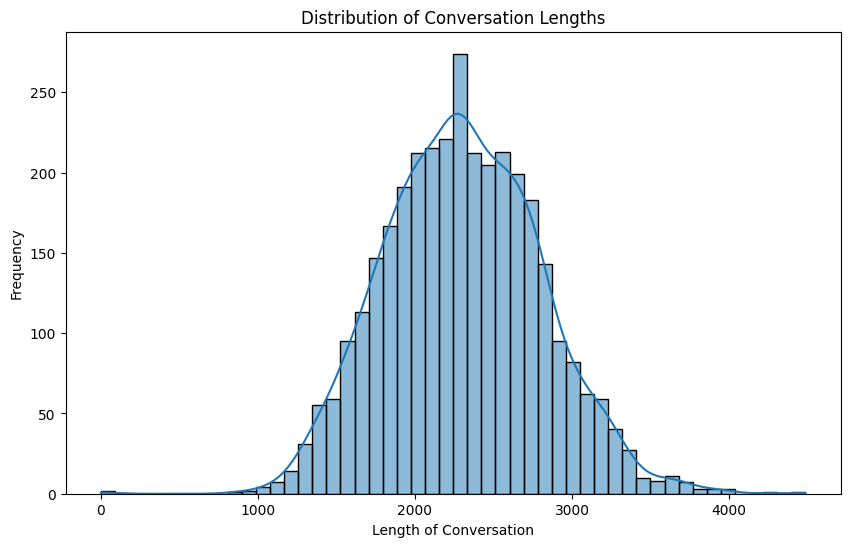

In [ ]:
# Handle missing values and ensure all entries are strings
df['conversation'] = df['conversation'].fillna("").astype(str)

# Calculate text length
df['text_length'] = df['conversation'].apply(len)

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Conversation Lengths')
plt.xlabel('Length of Conversation')
plt.ylabel('Frequency')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


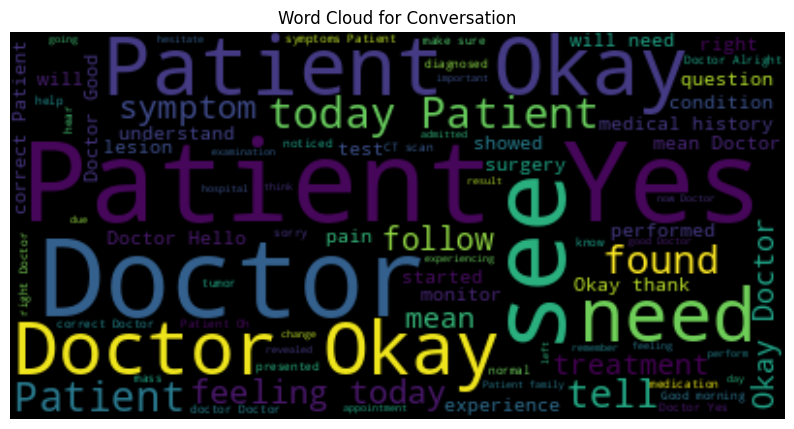

In [ ]:
#Exploring Common Themes in Conversations Using a Word Cloud
nltk.download('stopwords')

text = ' '.join(df['conversation'].dropna())
wordcloud = WordCloud(background_color="black").generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear") #displays the word cloud as an image.
plt.title('Word Cloud for Conversation')
plt.axis('off')
plt.show()

## **NLP** **Preprocessing**

In [ ]:
import nltk

# Download 'punkt_tab' data package
nltk.download('punkt_tab')
nltk.download('wordnet') # Download the 'wordnet' dataset

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# ... (rest of your imports and setup)

# Assign stopwords to a variable called stop_words
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer() # also initialize lemmatizer here

def preprocess_text(text):
    # 1. Convert to lowercase (handle float values)
    if isinstance(text, float):
        text = str(text)  # Convert float to string
    text = text.lower()

    #2.Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    #3.Tokenize text
    tokens = word_tokenize(text)

    #4.Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    #5.Join tokens back into a single string
    return ' '.join(tokens)

df['processed_text'] = df['conversation'].apply(preprocess_text)
print(df[['conversation', 'processed_text']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                        conversation  \
0  Doctor: Good morning, how are you feeling toda...   
1  Doctor: Hello, how are you feeling today?\nPat...   
2  Doctor: Hello, how are you feeling today?\nPat...   
3  Doctor: Hello, how are you feeling today?\nPat...   
4  Doctor: Good morning, how are you feeling toda...   

                                      processed_text  
0  doctor good morning feeling today patient im f...  
1  doctor hello feeling today patient great ive h...  
2  doctor hello feeling today patient great ive t...  
3  doctor hello feeling today patient good doctor...  
4  doctor good morning feeling today patient good...  


# **Sentiment Analysis**

                                      processed_text  sentiment
0  doctor good morning feeling today patient im f...   0.198718
1  doctor hello feeling today patient great ive h...   0.123464
2  doctor hello feeling today patient great ive t...   0.203988
3  doctor hello feeling today patient good doctor...  -0.077257
4  doctor good morning feeling today patient good...   0.185763


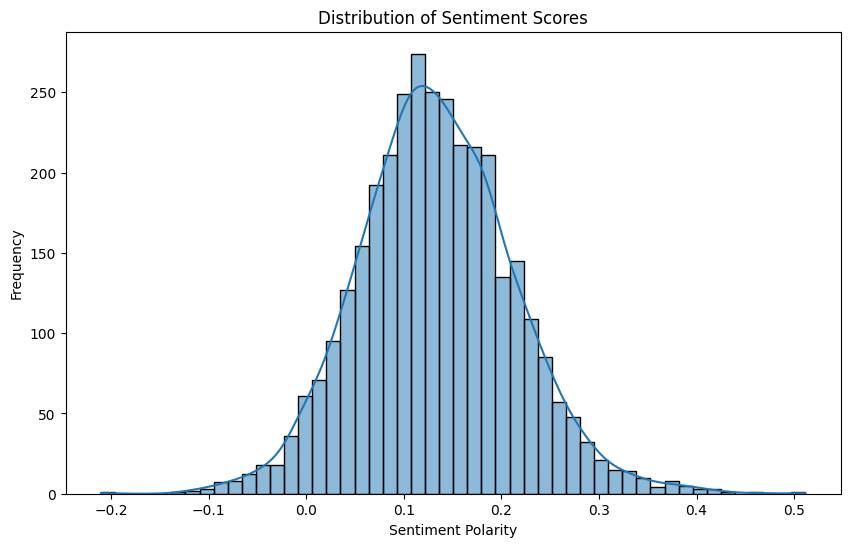

In [ ]:
#Using TextBlob
# Function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis to the processed_text column
df['sentiment'] = df['processed_text'].apply(get_sentiment)

# Display the sentiment scores
print(df[['processed_text', 'sentiment']].head())

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=50, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Medical Insurance Claim Processing



In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 83.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


                                      processed_text  \
0  doctor good morning feeling today patient im f...   
1  doctor hello feeling today patient great ive h...   
2  doctor hello feeling today patient great ive t...   
3  doctor hello feeling today patient good doctor...   
4  doctor good morning feeling today patient good...   

                                               claim  
0  {'patient_name': None, 'patient_age': None, 'd...  
1  {'patient_name': 'breathsmin breathsmin oxygen...  
2  {'patient_name': None, 'patient_age': None, 'd...  
3  {'patient_name': None, 'patient_age': None, 'd...  
4  {'patient_name': None, 'patient_age': None, 'd...  
                                      processed_text  \
0  doctor good morning feeling today patient im f...   
1  doctor hello feeling today patient great ive h...   
2  doctor hello feeling today patient great ive t...   
3  doctor hello feeling today patient good doctor...   
4  doctor good morning feeling today patient good... 

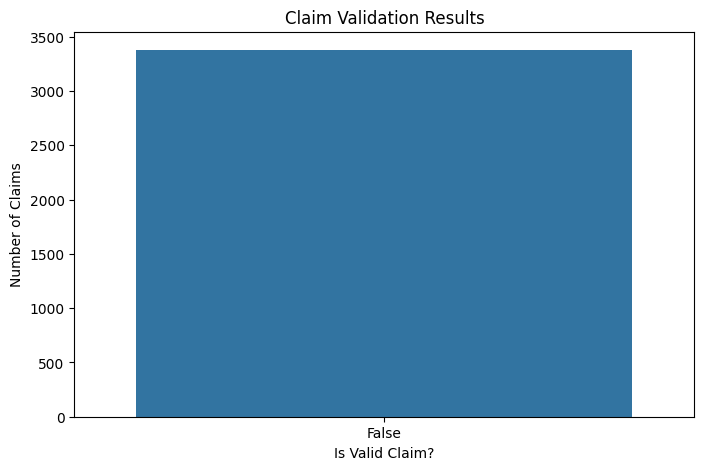

In [ ]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to extract entities
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply entity extraction to the 'processed_text' column
df['entities'] = df['processed_text'].apply(extract_entities)
# Medical Insurance Claim Processing

def process_insurance_claim(entities):
    claim = {
        "patient_name": None,
        "patient_age": None,
        "disease": None,
        "treatment": None,
        "date": None,
    }

    for entity, label in entities:
        if label == "PERSON":
            claim["patient_name"] = entity
        elif label == "DATE":
            claim["date"] = entity
        elif label == "GPE":
            claim["location"] = entity
        elif label == "NORP":
            claim["nationality"] = entity
        elif label == "DISEASE":
            claim["disease"] = entity
        elif label == "TREATMENT":
            claim["treatment"] = entity

    return claim

# Apply claim processing to each conversation
df['claim'] = df['entities'].apply(process_insurance_claim)

# Display the processed claims
print(df[['processed_text', 'claim']].head())

# Validate Claims
def validate_claim(claim):
    required_fields = ["patient_name", "disease", "treatment", "date"]
    missing_fields = [field for field in required_fields if not claim[field]]
    return len(missing_fields) == 0, missing_fields

# Apply validation to each claim
df['is_valid'], df['missing_fields'] = zip(*df['claim'].apply(validate_claim))

# Display the processed claims
print(df[['processed_text', 'claim']].head())

# Generate Claim Output
valid_claims = df[df['is_valid']]['claim']

import json
valid_claims_json = valid_claims.to_json(orient="records", indent=4)
print("Valid Claims in JSON Format:")
print(valid_claims_json)

with open("valid_claims.json", "w") as f:
    f.write(valid_claims_json)

# PLOT
plt.figure(figsize=(8, 5))
sns.countplot(x=df['is_valid'])
plt.title('Claim Validation Results')
plt.xlabel('Is Valid Claim?')
plt.ylabel('Number of Claims')
plt.show()

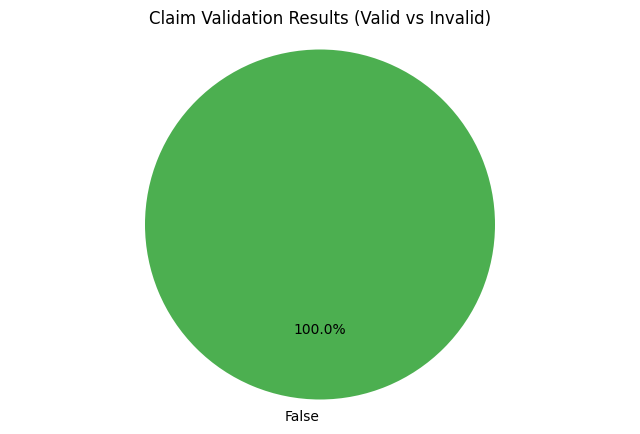

In [ ]:
#PLOT
valid_claim_count = df['is_valid'].value_counts()

plt.figure(figsize=(8, 5))
plt.pie(valid_claim_count, labels=valid_claim_count.index, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF5733'])
plt.title('Claim Validation Results (Valid vs Invalid)')
plt.axis('equal')
plt.show()